# Example usage of py-wsi

Author: @ysbecca


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import openslide
from openslide import open_slide  
from openslide.deepzoom import DeepZoomGenerator
from glob import glob

Set the path to the sample WSI to use here.

In [19]:
path = "/Users/ysbecca/ysbecca-projects/iciar-2018/data/WSI/04.svs"

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)

Load the sample .svs file as an example.

In [21]:
files = glob(path)
files

['/Users/ysbecca/ysbecca-projects/iciar-2018/data/WSI/04.svs']

In [126]:
slide = open_slide(files[0]) 

In [175]:
tile_size = 256  
tiles = DeepZoomGenerator(slide, tile_size=tile_size, overlap=0, limit_bounds=True)
# overlap adds pixels to each side
# See how many tiles there are for each level of magnification.
print(tiles.level_count)
print(tiles.level_dimensions)
print(tiles.level_tiles)

17
((1, 1), (2, 2), (3, 3), (6, 6), (12, 12), (24, 23), (48, 45), (95, 89), (190, 177), (379, 354), (757, 708), (1514, 1415), (3027, 2829), (6053, 5657), (12105, 11313), (24209, 22625), (48417, 45249))
((1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (3, 3), (6, 6), (12, 12), (24, 23), (48, 45), (95, 89), (190, 177))


In [177]:
tiles.level_tiles[12]

(12, 12)

In [178]:
tile = tiles.get_tile(tiles.level_count - 2, (10, 10))  
tile_np = np.array(tile)
np.shape(tile_np)

(256, 256, 3)

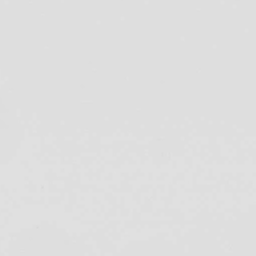

In [179]:
tile2 = tiles.get_tile(tiles.level_count - 2, (11, 11))
tile2

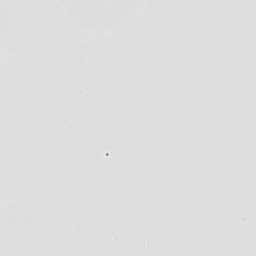

In [180]:
tile

In [186]:
np.shape(patches)

(2, 256, 256, 3)

In [181]:
slide.level_dimensions

((48417, 45249), (12104, 11312), (3026, 2828))

In [55]:
slide.level_downsamples

(1.0, 4.000085509506951, 16.000342038027803)

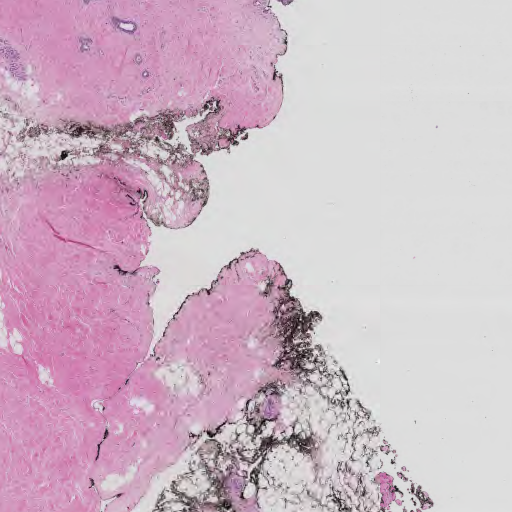

In [83]:
slide.read_region((40000, 30000), 2, (512,512))

In [169]:
slide.properties

<_PropertyMap {'aperio.AppMag': '20,000000', 'aperio.Date': '2013-12-13T10:30:01.53Z', 'aperio.Filename': 'ImageCollection_0000010170', 'aperio.MPP': '0,500000', 'aperio.OriginalHeight': '48417', 'aperio.OriginalWidth': '45249', 'openslide.comment': 'Aperio Image Library v12.4.0 \r\n48417x45249 (240x240) J2K/KDU Q=30;Leica SCN400;Leica SCN ver.1.5.0.10111 2011/09/07 12:35:23;1.5.0.10132|Filename = ImageCollection_0000010170|Date = 2013-12-13T10:30:01.53Z|AppMag = 20,000000|MPP = 0,500000|OriginalWidth = 45249|OriginalHeight = 48417', 'openslide.level-count': '3', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '45249', 'openslide.level[0].tile-height': '240', 'openslide.level[0].tile-width': '240', 'openslide.level[0].width': '48417', 'openslide.level[1].downsample': '4.0000855095069507', 'openslide.level[1].height': '11312', 'openslide.level[1].tile-height': '240', 'openslide.level[1].tile-width': '240', 'openslide.level[1].width': '12104', 'openslide.level[2].downs

In [174]:
tiles = []
tiles.append(tile_np)
np.shape(np.array(tiles))

(1, 768, 768, 3)

In [193]:
np.__version__

'1.12.1'

In [265]:
import pickle
import patch_reader as pr
import lmdb
from importlib import reload

import item as ite

reload(pr)
reload(ite)

<module 'item' from '/Users/ysbecca/ysbecca-projects/py-wsi/item.py'>

In [240]:
example_file = "04.svs"
example_dir = "/Users/ysbecca/ysbecca-projects/iciar-2018/data/WSI/"

In [241]:
patches, coords, ids = pr.sample_patches(example_file, example_dir, patch_size=128, percent_overlap=0.5, level=12)

Overlap pixels: 32
Tile size: 64
x_tiles: 48
y_tiles: 45


In [243]:
print(np.shape(patches))
print(len(patches))

(1890, 128, 128, 3)
1890


In [244]:
map_size = np.array(patches).nbytes * 10

In [245]:
env = lmdb.open('mylmdb', map_size=map_size)

In [246]:
env

In [247]:
with env.begin(write=True) as txn:
    # txn is a Transaction object
    for i in range(len(patches)):
        item = Item(patches[i], ids[i], coords[i], 1)
        str_id = example_file + '-' + str(coords[i][0]) + '-' + str(coords[i][1])

        # The encode is only essential in Python 3
        txn.put(str_id.encode('ascii'), pickle.dumps(item))

In [248]:
cursor.close()
with env.begin() as txn:
    cursor = txn.cursor()
    for key, value in cursor:
        print(key)


b'04.svs-1-1'
b'04.svs-1-10'
b'04.svs-1-11'
b'04.svs-1-12'
b'04.svs-1-13'
b'04.svs-1-14'
b'04.svs-1-15'
b'04.svs-1-16'
b'04.svs-1-17'
b'04.svs-1-18'
b'04.svs-1-19'
b'04.svs-1-2'
b'04.svs-1-20'
b'04.svs-1-21'
b'04.svs-1-22'
b'04.svs-1-23'
b'04.svs-1-24'
b'04.svs-1-25'
b'04.svs-1-26'
b'04.svs-1-27'
b'04.svs-1-28'
b'04.svs-1-29'
b'04.svs-1-3'
b'04.svs-1-30'
b'04.svs-1-31'
b'04.svs-1-32'
b'04.svs-1-33'
b'04.svs-1-34'
b'04.svs-1-35'
b'04.svs-1-36'
b'04.svs-1-37'
b'04.svs-1-38'
b'04.svs-1-39'
b'04.svs-1-4'
b'04.svs-1-40'
b'04.svs-1-41'
b'04.svs-1-42'
b'04.svs-1-5'
b'04.svs-1-6'
b'04.svs-1-7'
b'04.svs-1-8'
b'04.svs-1-9'
b'04.svs-10-1'
b'04.svs-10-10'
b'04.svs-10-11'
b'04.svs-10-12'
b'04.svs-10-13'
b'04.svs-10-14'
b'04.svs-10-15'
b'04.svs-10-16'
b'04.svs-10-17'
b'04.svs-10-18'
b'04.svs-10-19'
b'04.svs-10-2'
b'04.svs-10-20'
b'04.svs-10-21'
b'04.svs-10-22'
b'04.svs-10-23'
b'04.svs-10-24'
b'04.svs-10-25'
b'04.svs-10-26'
b'04.svs-10-27'
b'04.svs-10-28'
b'04.svs-10-29'
b'04.svs-10-3'
b'04.svs-10-30

b'04.svs-25-30'
b'04.svs-25-31'
b'04.svs-25-32'
b'04.svs-25-33'
b'04.svs-25-34'
b'04.svs-25-35'
b'04.svs-25-36'
b'04.svs-25-37'
b'04.svs-25-38'
b'04.svs-25-39'
b'04.svs-25-4'
b'04.svs-25-40'
b'04.svs-25-41'
b'04.svs-25-42'
b'04.svs-25-5'
b'04.svs-25-6'
b'04.svs-25-7'
b'04.svs-25-8'
b'04.svs-25-9'
b'04.svs-26-1'
b'04.svs-26-10'
b'04.svs-26-11'
b'04.svs-26-12'
b'04.svs-26-13'
b'04.svs-26-14'
b'04.svs-26-15'
b'04.svs-26-16'
b'04.svs-26-17'
b'04.svs-26-18'
b'04.svs-26-19'
b'04.svs-26-2'
b'04.svs-26-20'
b'04.svs-26-21'
b'04.svs-26-22'
b'04.svs-26-23'
b'04.svs-26-24'
b'04.svs-26-25'
b'04.svs-26-26'
b'04.svs-26-27'
b'04.svs-26-28'
b'04.svs-26-29'
b'04.svs-26-3'
b'04.svs-26-30'
b'04.svs-26-31'
b'04.svs-26-32'
b'04.svs-26-33'
b'04.svs-26-34'
b'04.svs-26-35'
b'04.svs-26-36'
b'04.svs-26-37'
b'04.svs-26-38'
b'04.svs-26-39'
b'04.svs-26-4'
b'04.svs-26-40'
b'04.svs-26-41'
b'04.svs-26-42'
b'04.svs-26-5'
b'04.svs-26-6'
b'04.svs-26-7'
b'04.svs-26-8'
b'04.svs-26-9'
b'04.svs-27-1'
b'04.svs-27-10'
b'04.svs

b'04.svs-43-42'
b'04.svs-43-5'
b'04.svs-43-6'
b'04.svs-43-7'
b'04.svs-43-8'
b'04.svs-43-9'
b'04.svs-44-1'
b'04.svs-44-10'
b'04.svs-44-11'
b'04.svs-44-12'
b'04.svs-44-13'
b'04.svs-44-14'
b'04.svs-44-15'
b'04.svs-44-16'
b'04.svs-44-17'
b'04.svs-44-18'
b'04.svs-44-19'
b'04.svs-44-2'
b'04.svs-44-20'
b'04.svs-44-21'
b'04.svs-44-22'
b'04.svs-44-23'
b'04.svs-44-24'
b'04.svs-44-25'
b'04.svs-44-26'
b'04.svs-44-27'
b'04.svs-44-28'
b'04.svs-44-29'
b'04.svs-44-3'
b'04.svs-44-30'
b'04.svs-44-31'
b'04.svs-44-32'
b'04.svs-44-33'
b'04.svs-44-34'
b'04.svs-44-35'
b'04.svs-44-36'
b'04.svs-44-37'
b'04.svs-44-38'
b'04.svs-44-39'
b'04.svs-44-4'
b'04.svs-44-40'
b'04.svs-44-41'
b'04.svs-44-42'
b'04.svs-44-5'
b'04.svs-44-6'
b'04.svs-44-7'
b'04.svs-44-8'
b'04.svs-44-9'
b'04.svs-45-1'
b'04.svs-45-10'
b'04.svs-45-11'
b'04.svs-45-12'
b'04.svs-45-13'
b'04.svs-45-14'
b'04.svs-45-15'
b'04.svs-45-16'
b'04.svs-45-17'
b'04.svs-45-18'
b'04.svs-45-19'
b'04.svs-45-2'
b'04.svs-45-20'
b'04.svs-45-21'
b'04.svs-45-22'
b'04.svs

In [249]:
print(env.stat())

{'psize': 4096, 'depth': 2, 'branch_pages': 1, 'leaf_pages': 21, 'overflow_pages': 183330, 'entries': 1890}


In [272]:
with env.begin() as txn:
    raw = txn.get(b'04.svs-1-1')


In [273]:
item_back = ite.unpickle(raw)

In [274]:
item_back

In [277]:
im = np.fromstring(item_back.data, dtype=np.uint8)

In [281]:
# print(patches[0][0])
print(im[0:10])

[222   0   0   0   0   0   0   0 222   0]


In [284]:
a = patches[0].tobytes()

In [293]:
a_flat = np.fromstring(a, dtype=np.uint64)

In [294]:
np.shape(a_flat)

(49152,)

In [295]:
a_flat.reshape(3, 128, 128)
# patches[0].dtype

array([[[222, 222, 222, ..., 221, 221, 221],
        [221, 221, 221, ..., 221, 221, 221],
        [221, 221, 221, ..., 222, 222, 222],
        ..., 
        [221, 221, 221, ..., 214, 214, 214],
        [221, 221, 221, ..., 221, 221, 221],
        [221, 221, 221, ..., 221, 221, 221]],

       [[221, 221, 221, ..., 216, 216, 216],
        [221, 221, 221, ..., 221, 221, 221],
        [221, 221, 221, ..., 221, 221, 221],
        ..., 
        [222, 222, 222, ..., 222, 222, 222],
        [222, 222, 222, ..., 222, 222, 222],
        [222, 222, 222, ..., 222, 222, 222]],

       [[222, 222, 222, ..., 222, 222, 222],
        [222, 222, 222, ..., 222, 222, 222],
        [221, 221, 221, ..., 222, 221, 221],
        ..., 
        [222, 222, 222, ..., 222, 223, 223],
        [223, 223, 223, ..., 222, 222, 222],
        [222, 222, 222, ..., 222, 222, 222]]], dtype=uint64)